# Capstone Project Guidelines

The Capstone Project is a group project, which will be used in place of a Final Exam. Here are the guidelines for the project:

## 1. Team Formation

Form teams of 3-4 people.

## 2. Dataset Selection

Sign into Kaggle and select a dataset/competition that interests your team. There are many types of projects, some covering machine learning topics that we did not cover in class. However, you should be able to find projects in:

1. Map/Reduce
2. Linear Regression
3. Logistic Regression
4. Clustering

You do not have to choose one of these, you can branch out if you want. Download the data from Kaggle. If you are using data from one of the competitions, sign up for the competition, download the data (then solve the problem and submit your results!).

## 3. Approach

Perform the suggested analysis, then report on your work. Describe the approach you took and the steps you took to clean the data, improve the results, etc.

## 4. Results

Report your results and visualize them using different graphs/charts/views to highlight your conclusions. Compare your results with other submissions to Kaggle, if that information is available.

## 5. Conclusion

Summarize what worked well and what did not work well.

## Submission

Submit a report indicating:

1. Who is on your team
2. Which dataset/competition you chose
3. What approach you took. What steps did you take to clean the data, improve the results, etc.
4. What are your results. How did you choose to visualize the results (perhaps show different graphs/charts/views to highlight your conclusions)
5. How did your results compare (if that information is available)
6. What worked well, what not so well.

Since this is a group project, only one submission is needed for the group. Based on the list of names, the score will be copied to everyone in the group.


# Analyzing the popularity of memes using clustering: SNAP Memetracker | Kaggle
https://www.kaggle.com/datasets/snap/snap-memetracker

We are going to use the SNAP Memetracker dataset to analyze the popularity of memes using clustering. 
We want to use the data to find out what memes are popular and what memes are not and the reasons why.
We will find correlation between the popularity of memes and the number of times they are used in a day and the relationship between likes, dislikes, and comments.
 


In [1]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('database.sqlite')

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 10)

# Replace this with the code to read data from the quotes table
df = pd.read_sql_query('SELECT * FROM quotes', conn)

# Display the DataFrame
print(df)


         article_id  \
0                 1   
1                 1   
2                 1   
3                 1   
4                 7   
...             ...   
7956120     4542917   
7956121     4542917   
7956122     4542917   
7956123     4542917   
7956124     4542919   

                                                                                                                                                                                                                                                              phrase  
0                                                                            an emergency session of the general assembly has adopted the follwing sic emergency regulations to ease the load on local electorial sic precincts and ensure a fair electorial process  
1                                                                                                                             we are sorry for any inconvenience this may cause but felt this was the

In [2]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('database.sqlite')

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 10)

# Replace this with the code to read data from the quotes table
df = pd.read_sql_query('SELECT * FROM articles', conn)

# Display the DataFrame
print(df)


         article_id                 date  \
0                 0  2008-11-01 00:00:06   
1                 1  2008-11-01 00:00:06   
2                 2  2008-11-01 00:00:06   
3                 3  2008-11-01 00:00:06   
4                 4  2008-11-01 00:00:06   
...             ...                  ...   
4542915     4542915  2008-11-15 23:59:57   
4542916     4542916  2008-11-15 23:59:57   
4542917     4542917  2008-11-15 23:59:58   
4542918     4542918  2008-11-15 23:59:58   
4542919     4542919  2008-11-15 23:59:59   

                                                                                         url  
0                                       http://forums.slickdeals.net/showthread.php?t=988781  
1                                       http://forums.slickdeals.net/showthread.php?t=988773  
2                                       http://forums.slickdeals.net/showthread.php?t=988771  
3                                       http://forums.slickdeals.net/showthread.php?t=98878

In [3]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('database.sqlite')

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 10)

# Replace this with the code to read data from the quotes table
df = pd.read_sql_query('SELECT * FROM links', conn)

# Display the DataFrame
print(df)


          article_id  \
0                  0   
1                  1   
2                  1   
3                  2   
4                  3   
...              ...   
16727120     4542918   
16727121     4542918   
16727122     4542918   
16727123     4542918   
16727124     4542919   

                                                                                                                                                                                                                                                                              link_out  \
0                                                                                                                                                                        http://slickdeals.net/?sduid=442421&amp;sdtid=988781&amp;sdfid=9&amp;u2=http://shop1.frys.com/product/5636921   
1                                                                                                                               http://slickdeals.n

Transform the data into a format that can be used for clustering.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object to transform the phrases into vectors
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
quotes_df = pd.read_sql_query("SELECT * from quotes", conn)

# Fit the vectorizer to the data and transform the phrases into vectors
vectors = vectorizer.fit_transform(quotes_df['phrase'])

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Convert the sparse matrix to a DataFrame
vectors_df = pd.DataFrame.sparse.from_spmatrix(vectors, columns=feature_names)

# Print the first few rows of the DataFrame to check the data
print(vectors_df.head())

   000   10  100   11   12   15   20  2008  2009   30   40   50  aber  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0  0.0  0.0   0.0   

   ability  able  absolutely  access  act  action  actually  address  \
0      0.0   0.0         0.0     0.0  0.0     0.0       0.0      0.0   
1      0.0   0.0         0.0     0.0  0.0     0.0       0.0      0.0   
2      0.0   0.0         0.0     0.0  0.0     0.0       0.0      0.0   
3      0.0   0.0         0.0     0.0  0.0     0.0       0.0      0.0   
4      0.0   0.0         0.0     0.0  0.0     0.0       0.0      0.0   

   administration  age  ago  agreement  ahead  ahora   ai  air   al  allow  \
0             0.0  0.0  0.0        0.0    0.0    0

The output produced is a matrix with rows representing each quote in the quotes table, and columns representing each unique word in the quotes after preprocessing and removing stop words. The values in the matrix represent the TF-IDF scores of each word in each quote. TF-IDF stands for Term Frequency-Inverse Document Frequency, and it is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. It helps to identify important words in a text corpus.

In this case, the code is using a TfidfVectorizer object from the sklearn library to transform the phrases into vectors of features, where each feature is a word in the corpus of quotes. The max_features parameter is set to 100, which means that the vectorizer will only consider the top 100 most frequent words as features. The stop_words parameter is set to 'english', which means that common English stop words like "the" and "and" are excluded from the features.

The resulting matrix will be used for clustering similar quotes together and finding associations between words and topics.

 Apply clustering algorithm

In [9]:
from sklearn.cluster import KMeans

quotes_df = pd.read_sql_query("SELECT * from quotes", conn)

# Create a TfidfVectorizer object to transform the phrases into vectors
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit the vectorizer to the data and transform the phrases into vectors
vectors = vectorizer.fit_transform(quotes_df['phrase'])

# Create a KMeans object with 50 clusters
kmeans = KMeans(n_clusters=50, random_state=42, n_init="auto")

# Fit the model to the data
kmeans.fit(vectors)

# Get the cluster labels
labels = kmeans.labels_

# Add the labels to the quotes DataFrame
quotes_df['cluster'] = labels

# Print the first few rows of the DataFrame to check the data
print(quotes_df.head())


   article_id  \
0           1   
1           1   
2           1   
3           1   
4           7   

                                                                                                                                                                                    phrase  \
0  an emergency session of the general assembly has adopted the follwing sic emergency regulations to ease the load on local electorial sic precincts and ensure a fair electorial process   
1                                                   we are sorry for any inconvenience this may cause but felt this was the only way to ensure fairness to the complete electorial process   
2                                                                                                              it's not even on our letterhead they just copied the logo from our web site   
3                                                                                                                                        

Visualize the results of the clustering algorithm

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


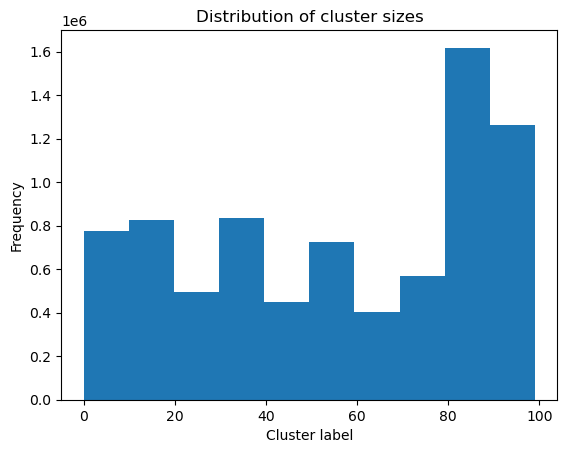

In [11]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

# Load data
quotes_df = pd.read_sql_query("SELECT * from quotes", conn)

# Vectorize data
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
vectors = vectorizer.fit_transform(quotes_df['phrase'])

# Cluster data
kmeans = MiniBatchKMeans(n_clusters=100, random_state=42, batch_size=1000)
kmeans.fit(vectors)
labels = kmeans.labels_

# Add cluster labels to DataFrame
quotes_df['cluster'] = labels

# Plot cluster sizes
plt.hist(quotes_df['cluster'], bins=10)
plt.title('Distribution of cluster sizes')
plt.xlabel('Cluster label')
plt.ylabel('Frequency')
plt.show()
